# KAGRA DRFPI

### Originally written by K Somiya, Converted to jupyter by KK      ###

In [216]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [218]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

## Main Interferometer

In [221]:
# With __actual__ curvature errors
# no offset on mirrors (even for ETMs)
# we will compare GWad with and without the curvature error.
# RoCs and distances same as shown in KAGRA wiki (updated 171025)
# no finesse imbalance, no loss in ITMs
# no detune of SRC
#
# f2 and f3 added by KK


base = finesse.kat()
base.verbose=False
base.parse("""
# clight 299792458.0 

l i1 83.74 0  nL                  #I0=780W
const fmod1 16.880962M            #f1
const fmod2 45.0159M              #f2
const fmod3 56.2699M              #f3

mod eo1 $fmod1 0.1 1 pm 0 nL neo1
s seo1 0 neo1 neo2
mod eo2 $fmod2 0.1 1 pm 0 neo2 neo3
s seo2 0 neo3 neo4
mod eo3 $fmod3 0.05 1 am 0 neo4 neo5

s eo1refl 0 neo5 neo22
bs refl 0.0001 0.9999 0 45 neo22 dump npr nREFL   #REFL
s bsm 0 npr nprb
m prm 0.90 0.10 0 nprb nf0
s Lp1 14.7615 nf0 nf1 #14.7615 
bs PR2 1 0 0 0 nf1 nf2 dump dump # not tilted
s Lp2 11.0661 nf2 nf3
bs PR3 1 0 0 0 nf3 nf4 dump dump # not tilted
s Lp3 15.7638 nf4 n1

bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #BS
s bs1bsAR1 0 n3hr n3hr2
m bsAR1 0 1 0 n3hr2 n3ar
s subBS1 0.0 1.45 n3ar n3ar2 # BS thickness is ignored 
m bsAR3 0 1 0 n3ar2 n3
s bs1bsAR2 0 n4hr n4hr2
m bsAR2 0 1 0 n4hr2 n4ar
s subBS2 0.0 1.45 n4ar n4ar2 # BS thickness is ignored 
m bsAR4 0 1 0 n4ar2 n4

s Lmx 26.6649  n3 n6
s Lmy 23.3351  n2 n5

bs ARx 200e-6 0.9998 0 0.025 n6 nPOX n6ar dump   #wedged ITM
bs ARy 200e-6 0.9998 0 0.025 n5 dump n5ar dump   #wedged ITM

s subx 0.0 1.754 n6ar n6hr # ITM thickness is ignored
s suby 0.0 1.754 n5ar n5hr # ITM thickness is ignored

## m ITMx ... n6hr n11
## m ITMy ... n5hr n9  

s Lx  3000    n11 n12
s Ly  3000    n9 n10

## m ETMx ... n12 n14
## m ETMy ... n10 n13 

s Ls3 15.7386 n4 nf4s
bs SR3 1 0 0 0.0 nf4s nf3s dump dump # not tilted
s Ls2 11.1115 nf3s nf2s
bs SR2 1 0 0 0.0 nf2s nf1s dump dump # not tilted
s Ls1 14.7412 nf1s n7

m srm 0.85 0.15 -0.83 n7 n8
s ssrmAR 0 1.45 n8 nsrmAR1 # srm thickness is ignored
m srmAR 0 1 0 nsrmAR1 nsrmAR2

attr ITMx Rc -1900 % no error
attr ITMy Rc -1900 % no error
attr ARx Rc 0
attr ARy Rc 0

attr ETMx Rc 1900 
attr ETMy Rc 1900
attr prm Rc -458.1285
attr srm Rc  458.1285

attr PR2 Rc -3.0764
attr PR3 Rc 24.9165
attr SR2 Rc -2.9872
attr SR3 Rc 24.9165

m ETMx 0.999945 10e-6  90 n12 n14
m ETMy 0.999945 10e-6  -0 n10 n13 
m ITMx 0.996 4000e-6 90 n6hr n11 #flat
m ITMy 0.996 4000e-6 0 n5hr n9  

%%% real MMT and OMC %%%

const mmtangle 3.0

s ssrcmmt 6.0 nsrmAR2 nmmt1
bs mmt1 0.99997 0 0 $mmtangle nmmt1 nmmt2 dump dump
s smmt 2.6 nmmt2 nmmt3
bs mmt2 0.99997 0 0 -$mmtangle nmmt3 nmmt4 dump dump
s smmtomc 2.71 nmmt4 nmmt5

bs ofi1 1 0 0 0 nmmt5 nmmt6 dump dump
s sofiostm1 0.26 nmmt6 nmmt7
bs ofi2 1 0 0 0 nmmt7 nmmt8 dump dump
s sofiostm2 0.33 nmmt8 nomci


const omcangle 3.0 # omc angle is corrected
const ARangle 4.45 
const omc1angle 2.07

bs omcAR 0 1 0 -$ARangle nomci dump nomci1 dump
s somcsub 0 1.45 nomci1 nomci2 # omc thickness is ignored
bs omc1 0.996 0.004 0 -$omc1angle nomci2 dump nomc1 nomc8
s somc1 0.357316 nomc1 nomc2
bs omc2 0.996 0.004 0 $omcangle nomc2 nomc3 nomco dump
s somc2 0.359284 nomc3 nomc4
bs omc3 1 0 0 -$omcangle nomc4 nomc5 dump dump
s somc3 0.357316 nomc5 nomc6
bs omc4 1 0 0 -$omcangle nomc6 nomc7 dump dump
s somc4 0.359284 nomc7 nomc8
%s omc2pdloss 0.495 nomco nomco2 #changed 171031
s omc2pdloss 0.284 nomco nomco2 #changed 171114
bs pdloss 0.1 0.9 0 45 nomco2 dump nPD dump   #PD loss

attr mmt1 Rc 13.16	#solution2;
attr mmt2 Rc 44.39	#solution2

attr omc1 Rc 0
attr omc2 Rc 0
attr omc3 Rc 1.80
attr omc4 Rc 1.80

### parameters to be tuned ###
######                     ###

cav srcN srm n7 ITMy n5hr
cav prcN prm nf0 ITMx n6hr
cav xarm ITMx n11 ETMx n12
cav yarm ITMy n9 ETMy n10
cav omc omc1 nomc1 omc1 nomc8


tf sus1 1 0 p 1 1000 # pole at 1Hz, Q=1000
attr ETMx mass 22.8 zmech sus1
attr ETMy mass 22.8 zmech sus1
attr ITMx mass 22.8 zmech sus1
attr ITMy mass 22.8 zmech sus1

maxtem 1
trace 8
""")
base.maxtem=4

## Fielda Checks

### Fields in PRC

<function matplotlib.pyplot.show(*args, **kw)>

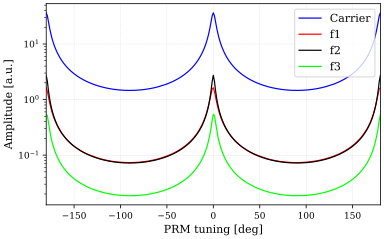

In [222]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRPRC 0 nf0
ad f1PRC 16.880962M nf0
ad f2PRC 45.0159M   nf0
ad f3PRC 56.2699M   nf0
xaxis prm phi lin -180 180 300
""")

out = kat0.run()
plt.semilogy(out.x, out["CRPRC"],label="Carrier")
plt.semilogy(out.x, out["f1PRC"],label="f1")
plt.semilogy(out.x, out["f2PRC"],label="f2")
plt.semilogy(out.x, out["f3PRC"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

### Fields in SRC

<function matplotlib.pyplot.show(*args, **kw)>

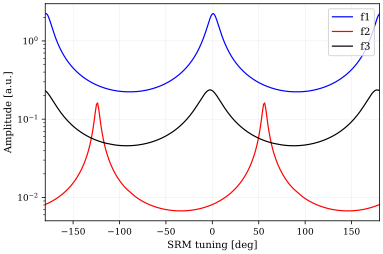

In [201]:
kat0 = base.deepcopy()
kat0.parse("""
ad CRSRC 0 n7*
ad f1SRC 16.880962M n7*
ad f2SRC 45.0159M   n7*
ad f3SRC 56.2699M   n7*
xaxis* srm phi lin -180 180 300
""")

out = kat0.run()
#plt.semilogy(out.x, out["CRSRC"],label="Carrier")
plt.semilogy(out.x, out["f1SRC"],label="f1")
plt.plot(out.x, out["f2SRC"],label="f2")
plt.semilogy(out.x, out["f3SRC"],label="f3")
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

### Wigh HOM, they behave differently

<function matplotlib.pyplot.show(*args, **kw)>

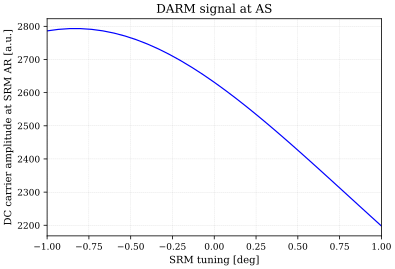

In [193]:
kat3 = base.deepcopy()
kat3.parse("""
fsig sigLm1 ETMx 1000 0	
fsig sigLm2 ETMy 1000 180
ad GWad 0 0 1000 n8
xaxis srm phi lin -1 1 30
yaxis log abs
""")
out = kat3.run()
plt.plot(out.x, out["GWad"],label="ETMX TRANS")
plt.xlabel("SRM tuning [deg]")
plt.ylabel("DC carrier amplitude at SRM AR [a.u.]")
plt.title("DARM signal at AS")
plt.show

### OMMT Tuning

<function matplotlib.pyplot.show(*args, **kw)>

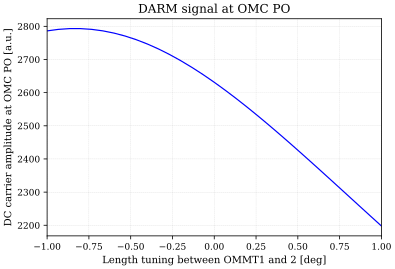

In [194]:
kat4 = base.deepcopy()
kat4.parse("""
fsig sigLm1 ETMx 1000 0	
fsig sigLm2 ETMy 1000 180
ad GWad 0 0 1000 nPD
xaxis smmt L lin 2.5 2.65 30
yaxis log abs
""")

out = kat3.run()
plt.plot(out.x, out["GWad"],label="")
plt.xlabel("Length tuning between OMMT1 and 2 [deg]")
plt.ylabel("DC carrier amplitude at OMC PO [a.u.]")
plt.title("DARM signal at OMC PO")
plt.show

### HOM after OMC

<function matplotlib.pyplot.show(*args, **kw)>

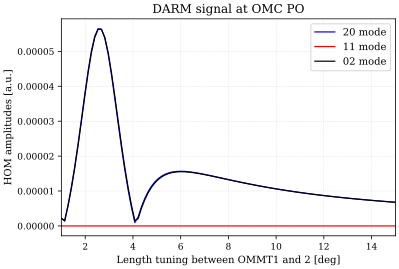

In [208]:
kat5 = base.deepcopy()
kat5.parse("""
fsig sigLm1 ETMx 1000 0	
fsig sigLm2 ETMy 1000 180
ad ad00 0 0 0 nPD
ad ad20 2 0 0 nPD
ad ad11 1 1 0 nPD
ad ad02 0 2 0 nPD
xaxis smmt L lin 1 15 100
yaxis log abs
""")
out = kat5.run()
#plt.plot(out.x, out["ad00"],label="00 mode")
plt.plot(out.x, out["ad20"],label="20 mode")
plt.plot(out.x, out["ad11"],label="11 mode")
plt.plot(out.x, out["ad02"],label="02 mode")
plt.legend(loc=0)
plt.xlabel("Length tuning between OMMT1 and 2 [deg]")
plt.ylabel("HOM amplitudes [a.u.]")
plt.title("DARM signal at OMC PO")
plt.show

### Spectrum

<function matplotlib.pyplot.show(*args, **kw)>

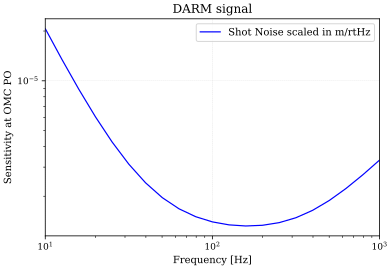

In [209]:
kat6 = base.deepcopy()
kat6.parse("""
fsig sigLm1 ETMx 1000 0	
fsig sigLm2 ETMy 1000 180
pdS2 GW 0 0 1000 max nPD
noplot GW
set sens1 GW abs
func sens2 = $sens1 / 3000 * 1064E-9 / (2*3.14)
xaxis sigLm1 f log 10 1k 20
put GW f2 $x1
scale meter
#yaxis log abs
#pause
""")

out = kat6.run()
plt.loglog(out.x, out["GW"],label="Shot Noise scaled in m/rtHz")
plt.legend(loc=0)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Sensitivity at OMC PO")
plt.title("DARM signal")
plt.show

In [197]:
Lprc = 14.7615+11.0661+15.7638+(23.3351+26.6649)/2
FSRprc = 299792458/2/Lprc;
f1 = 16.880962e6;         #f1
f2 = 45.0159e6;           #f2
f3 = 56.2699e6;           #f3

print(Lprc)
print(f1/FSRprc)
print(f2/FSRprc)
print(f3/FSRprc)

66.5914
7.499367398540758
19.998313655108692
24.99790317513591


## Sensitivity

<function matplotlib.pyplot.show(*args, **kw)>

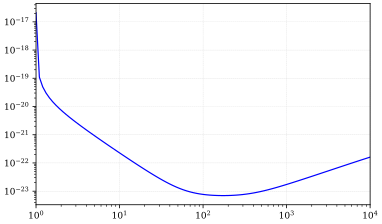

In [223]:
kat1 = base.deepcopy()
kat1.parse("""
fsig sigLm1 ETMx 1000 0
fsig sigLm2 ETMy 1000 180
qnoisedS GW    1 $fs nPD
noplot GW
set sens1 GW abs
func sens2 = $sens1 / 3000 * 1064E-9 / (2*3.14)
xaxis sigLm1 f log 1 10k 100
yaxis log abs
pause
trace 2""")

out = kat1.run()

# Calibrate
plt.loglog(out.x, abs(out["GW"])/3000*1064e-9/6.28, label="Sensitivity")
plt.show

In [212]:
abs(1)

1